In [ ]:
import pandas as pd

##Checking the Encoding of the CSV file

In [ ]:
#detecting the encoding of the csv file
file_path = "/content/spotify-2023.csv"
df = pd.read_csv(file_path, encoding='latin1')

import chardet


with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
confidence = result['confidence']

print(f"The detected encoding is {encoding} with confidence {confidence}")

# Using the detected encoding to read the CSV file
df = pd.read_csv(file_path, encoding=encoding)


The detected encoding is ISO-8859-1 with confidence 0.73


##Loading the Dataset

In [ ]:
data = pd.read_csv("/content/spotify-2023.csv", encoding='ISO-8859-1')


In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


##**Exploratory Data Analysis**


##Checking the Datatypes and missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**Checking the Columns with data types - Object**

In [ ]:
df = data

# Selecting columns with object data types
object_columns = df.select_dtypes(include=['object']).columns

# Printing the first 5 rows of the selected columns
print(df[object_columns].head())


                            track_name    artist(s)_name    streams  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook  141381703   
1                                 LALA       Myke Towers  133716286   
2                              vampire    Olivia Rodrigo  140003974   
3                         Cruel Summer      Taylor Swift  800840817   
4                       WHERE SHE GOES         Bad Bunny  303236322   

  in_deezer_playlists in_shazam_charts key   mode  
0                  45              826   B  Major  
1                  58              382  C#  Major  
2                  91              949   F  Major  
3                 125              548   A  Major  
4                  87              425   A  Minor  


#**Analyzing the outliers in streams**

In [ ]:
#Analyzing the streams column
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

non_numeric_rows = data[data['streams'].isna()]

for index, row in non_numeric_rows.iterrows():
    print(row)

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                                 NaN
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [ ]:
#dropping the row 574 where streams value is BPM110KeyAModeMajorDanceability53Valence75Ener...
data = data.drop(index=574)

In [ ]:
top_50_songs = data.sort_values(by='streams', ascending=False).head(50)

top_50_songs.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


###row 123 is having a very small value of streams, it seems there is a mistake or it's an outlier, so we will drop it for now

In [ ]:
data.iloc[123]

track_name                             Que Vuelvas
artist(s)_name          Carin Leon, Grupo Frontera
artist_count                                     2
released_year                                 2022
released_month                                  12
released_day                                     9
in_spotify_playlists                           763
in_spotify_charts                               26
streams                                     2762.0
in_apple_playlists                              21
in_apple_charts                                110
in_deezer_playlists                             21
in_deezer_charts                                 9
in_shazam_charts                                71
bpm                                            162
key                                             A#
mode                                         Major
danceability_%                                  49
valence_%                                       78
energy_%                       

In [ ]:
data = data.drop(index=123)

In [ ]:
last_50_songs = data.sort_values(by='streams', ascending=True).head(50)

last_50_songs.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184.0,13,...,105,G,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388.0,17,...,97,NaN,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641.0,5,...,133,B,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425.0,36,...,140,C#,Major,56,48,73,0,0,35,4
58,S91,Karol G,1,2023,7,14,525,41,16011326.0,34,...,128,NaN,Minor,86,42,72,59,0,9,19


**Analyzing in_deezer_playlists column**

In [ ]:
# Removing commas and convert to int64
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'].str.replace(',', ''), errors='coerce').astype('Int64')

print(data['in_deezer_playlists'].head())

0     45
1     58
2     91
3    125
4     87
Name: in_deezer_playlists, dtype: Int64


In [ ]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].astype('int64')

In [ ]:
missing_values_count = data['in_deezer_charts'].isnull().sum()
print("Count of missing values in 'in_deezer_charts':", missing_values_count)


Count of missing values in 'in_deezer_charts': 0


In [ ]:
non_numerical_count = data['in_deezer_charts'].apply(lambda x: not str(x).isdigit()).sum()
print("Count of non-numerical values in 'in_deezer_charts':", non_numerical_count)


Count of non-numerical values in 'in_deezer_charts': 0


**Analyzing in_shazam_charts**

In [ ]:
#data['in_shazam_charts'] = data['in_shazam_charts'].astype('int64')

Getting error because of some non-alphanumeric characters, so this column needs some cleaning.

In [ ]:
# Removing commas and convert to int64
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'].str.replace(',', ''), errors='coerce').astype('Int64')

print(data['in_shazam_charts'].head())


0    826
1    382
2    949
3    548
4    425
Name: in_shazam_charts, dtype: Int64


#**Exploring Artists column**

In [ ]:
data["artist(s)_name"]

0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
948          Selena Gomez
949          Taylor Swift
950    Feid, Paulo Londra
951    Feid, Sech, Jhayco
952             Burna Boy
Name: artist(s)_name, Length: 951, dtype: object

In [ ]:
import pandas as pd


# Splitting the 'artist(s)_name' column by commas and create a new dataFrame
artists_split = data['artist(s)_name'].str.split(', ', expand=True)

# Add a new column to store the original index for merging purposes
artists_split['original_index'] = data.index

# Reshaping the dataFrame by melting
melted_artists = pd.melt(artists_split, id_vars='original_index', value_vars=[0, 1, 2, 3, 4])

# Merging the melted dataFrame with the original dataFrame using the original index
merged_data = pd.merge(data, melted_artists, left_index=True, right_on='original_index')

# Dropped unnecessary columns and rename the 'value' column to 'artist_name'
merged_data = merged_data.drop(['artist(s)_name', 'original_index', 'variable'], axis=1)
merged_data = merged_data.rename(columns={'value': 'artist_name'})

# Dropped rows where 'artist_name' is NaN
merged_data = merged_data.dropna(subset=['artist_name'])

# Resetting the index if needed
merged_data = merged_data.reset_index(drop=True)

# Print the first few rows to verify the changes
print(merged_data['artist_name'].head())


0             Latto
1         Jung Kook
2       Myke Towers
3    Olivia Rodrigo
4      Taylor Swift
Name: artist_name, dtype: object


In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
#Count the occurrences of each number of artists
artist_count_counts = data['artist_count'].value_counts()

# Print the count of rows for each number of artists
print(artist_count_counts)


1    586
2    253
3     85
4     15
5      5
6      3
8      2
7      2
Name: artist_count, dtype: int64


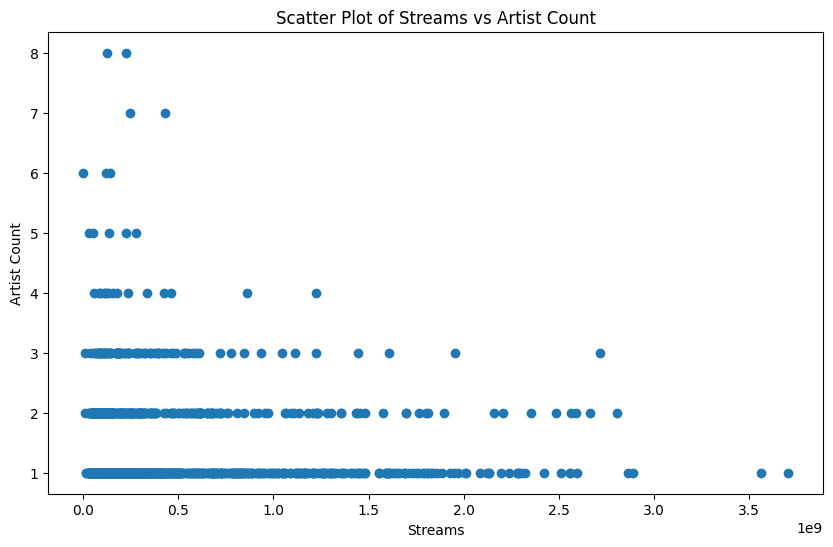

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['streams'], data['artist_count'])
plt.xlabel('Streams')
plt.ylabel('Artist Count')
plt.title('Scatter Plot of Streams vs Artist Count')
plt.show()

In [ ]:
import re

# Extract artist names into a list and split multiple artists
all_artists = [artist.strip() for artists in data['artist(s)_name'].str.split(',') for artist in artists]

# Count the total number of unique artists
total_unique_artists = len(set(all_artists))

# Convert artists to lowercase and clean the data by removing non-alphanumeric characters
cleaned_artists = [re.sub(r'[^a-zA-Z0-9 ]', '', artist.lower()) for artist in all_artists]

# Print the results
print(f"Total Unique Artists: {total_unique_artists}")
print(f"Cleaned Artists: {cleaned_artists}")


Total Unique Artists: 698
Cleaned Artists: ['latto', 'jung kook', 'myke towers', 'olivia rodrigo', 'taylor swift', 'bad bunny', 'dave', 'central cee', 'eslabon armado', 'peso pluma', 'quevedo', 'gunna', 'peso pluma', 'yng lvcas', 'bad bunny', 'grupo frontera', 'newjeans', 'miley cyrus', 'david kushner', 'harry styles', 'sza', 'fifty fifty', 'billie eilish', 'feid', 'young miko', 'jimin', 'gabito ballesteros', 'junior h', 'peso pluma', 'taylor swift', 'arctic monkeys', 'bizarrap', 'peso pluma', 'the weeknd', 'madonna', 'playboi carti', 'fuerza regida', 'rma', 'selena g', 'tainy', 'bad bunny', 'morgan wallen', 'dua lipa', 'troye sivan', 'peso pluma', 'grupo frontera', 'the weeknd', '21 savage', 'metro boomin', 'taylor swift', 'karol g', 'shakira', 'big one', 'duki', 'lit killah', 'maria becerra', 'fmk', 'rusherking', 'emilia', 'tiago pzk', 'yahritza y su esencia', 'grupo frontera', 'taylor swift', 'taylor swift', 'fuerza regida', 'junior h', 'peso pluma', 'post malone', 'swae lee', 'bebe

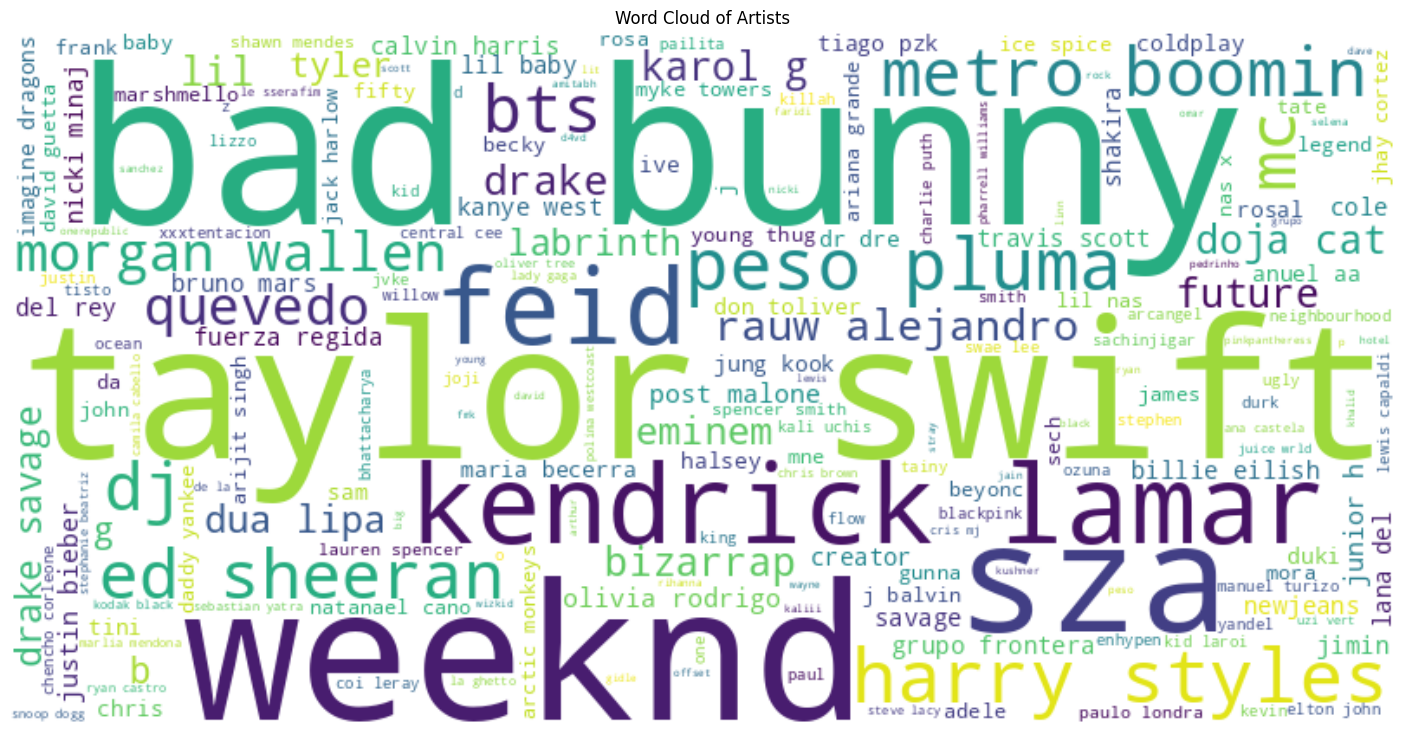

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all artist names separated by spaces
artists_text = ' '.join(cleaned_artists)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='viridis', collocations=True).generate(artists_text)

# Plot the WordCloud image
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artists')
plt.show()


In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


**Converting the numerical columns(object data type) to int64**

In [ ]:
data['streams'] = data['streams'].astype('int64')


In [ ]:
df= data

In [ ]:
# Define a mapping for 'key' column
key_mapping = {'C': 1, 'C#': 2, 'D': 3, 'D#': 4, 'E': 5, 'F': 6, 'F#': 7, 'G': 8, 'G#': 9, 'A': 10, 'A#': 11, 'B': 12}

# Define a mapping for 'mode' column
mode_mapping = {'Major': 1, 'Minor': 0}

# Map the values and create new columns
df['key_encoded'] = df['key'].map(key_mapping)
df['mode_encoded'] = df['mode'].map(mode_mapping)

# Drop the original 'key' and 'mode' columns
df = df.drop(['key', 'mode'], axis=1)



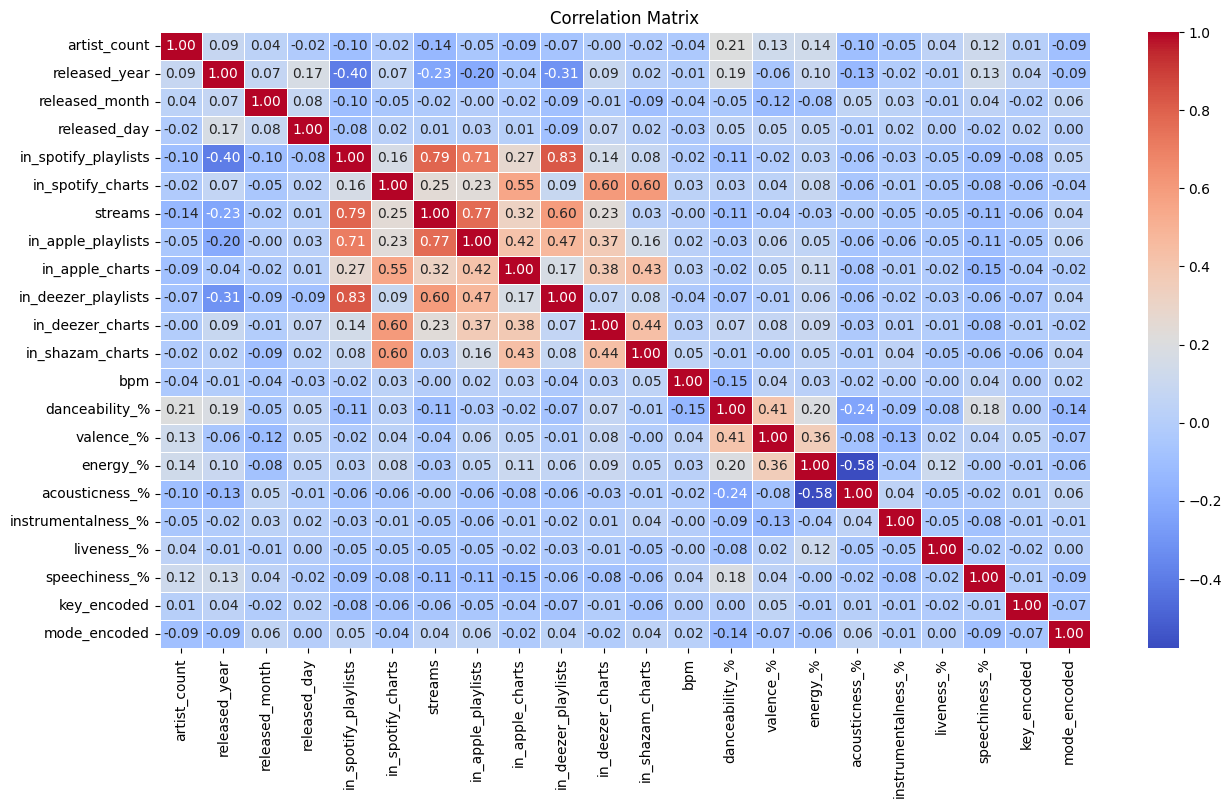

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



#**Analyzing the correlated independent variables**



> **artist_count** - It has low but still considerable value of correlation which is **-0.14**

> **released_year** - it is somewhat inversely correlated with the stream, with correlation of **-0.23**


> **released_month and released_date** - these are not correlated with our target variable.


> **in_spotify_playlist** - It is highly correlated with the number of stream, with correlation of **0.79**, which is highest among all.

> **in_spotify_chart** - it's somewhat related with target variable with correlation value of **0.25**.

>**in_apple_playlist** - it is also highly correlated same as that of in_spotify_playlist with a correlation value of - **0.77**.

>**in_apple_chart** - it's also having a good correlation value of **0.32**

> **in_deezer_playlist** - high correlation with target variable, with correlation value of **0.60**

> **in_deezer_chart** - it has somewhat good correlation with value of **0.23**

> **in_shazam_chart** - surprisingly, the shazam chart isn't correlated with stream count.

>**danceability** - it has a correlation value of **-0.11**

> **speechiness** - it has same correlation vale as that of danceability












#**Most common words in Track name**

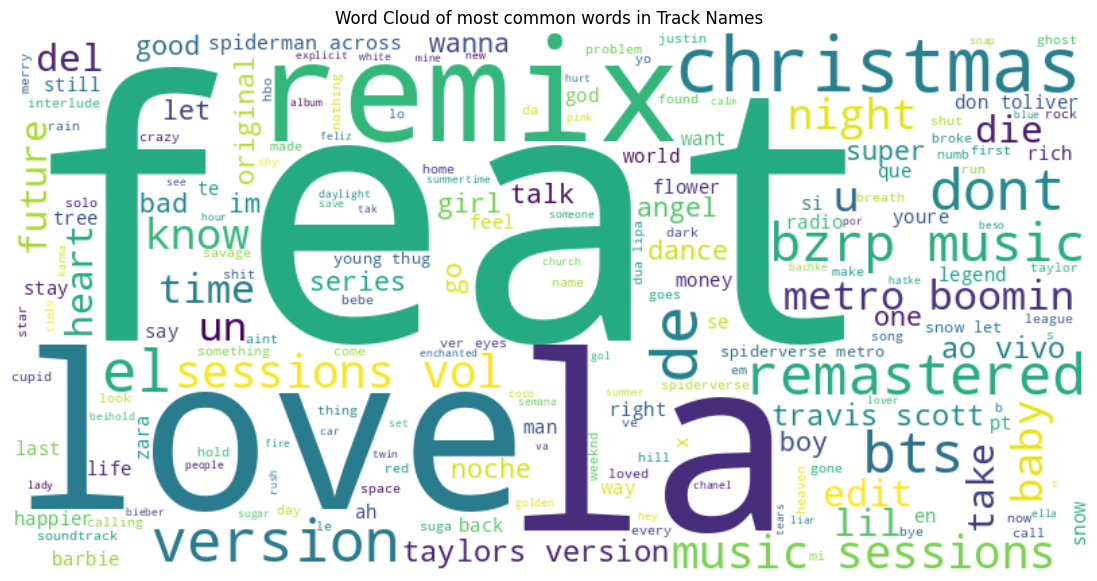

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


# Extract 'track_name' column into a list
track_names = data['track_name'].tolist()

# Convert track names to lowercase and clean them
cleaned_track_names = [re.sub(r'[^a-zA-Z\s]', '', track.lower()) for track in track_names]

# Combine the cleaned track names into a single string
track_names_text = ' '.join(cleaned_track_names)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(track_names_text)

# Plot the WordCloud image
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of most common words in Track Names')
plt.show()


#**Model Building**

In [ ]:
#first we need to drop non-required independent variable columns
# keeping ['artist_count', 'released_year', 'in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts']


df = data
# Now, convert the 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Converting 'streams' to millions with rounding
#df['streams'] = (df['streams'] / 100000).round(3)

# List of columns to keep
columns_to_keep = ['artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts',
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', "danceability_%","speechiness_%",'valence_%', 'energy_%', 'instrumentalness_%', 'liveness_%',"streams"]

# Creating a new DataFrame with the selected columns
df = df[columns_to_keep] # Make a copy to avoid the SettingWithCopyWarning




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features (X) and Target variable (y)
X = df.drop('streams', axis=1)
y = df['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

evaluate_model('Random Forest', y_test, rf_pred)
evaluate_model('Gradient Boosting', y_test, gb_pred)
evaluate_model('K-Nearest Neighbors', y_test, knn_pred)


Random Forest - Mean Squared Error: 40503951752999920.00, R-squared: 0.86
Gradient Boosting - Mean Squared Error: 36289914673567808.00, R-squared: 0.88
K-Nearest Neighbors - Mean Squared Error: 85186963063376432.00, R-squared: 0.71


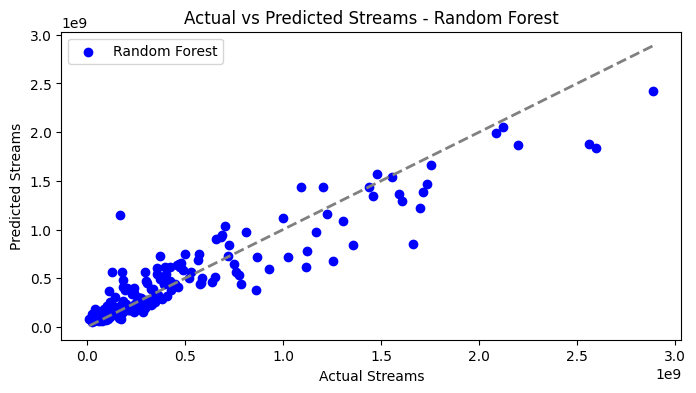

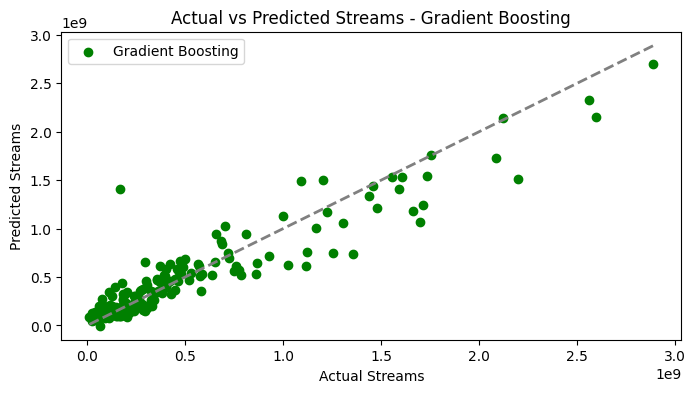

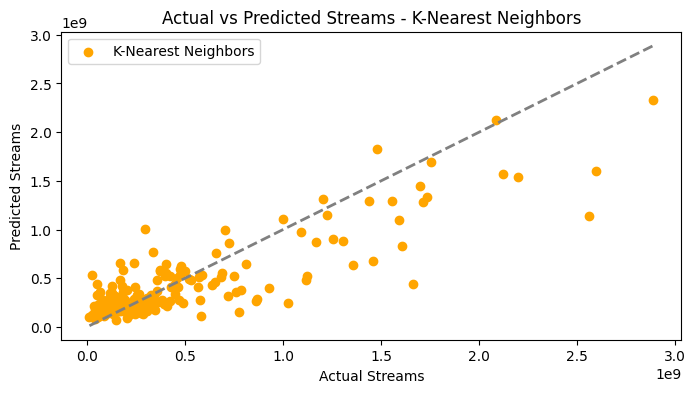

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_pred, color='blue', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - Random Forest')
plt.legend()
plt.show()

# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_pred, color='green', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - Gradient Boosting')
plt.legend()
plt.show()

# Plot actual vs predicted for K-Nearest Neighbors
plt.figure(figsize=(8, 4))
plt.scatter(y_test, knn_pred, color='orange', label='K-Nearest Neighbors')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams - K-Nearest Neighbors')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Features (X) and Target variable (y)
X = df.drop('streams', axis=1)
y = df['streams']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Calculate and print the mean R-squared score
mean_r2 = cv_scores.mean()
print("Mean R-squared:", mean_r2)



Cross-Validation R-squared scores: [0.77019754 0.87789891 0.71879736 0.82790505 0.53128103]
Mean R-squared: 0.7452159758751289


#**Questions asked in the Assignment**


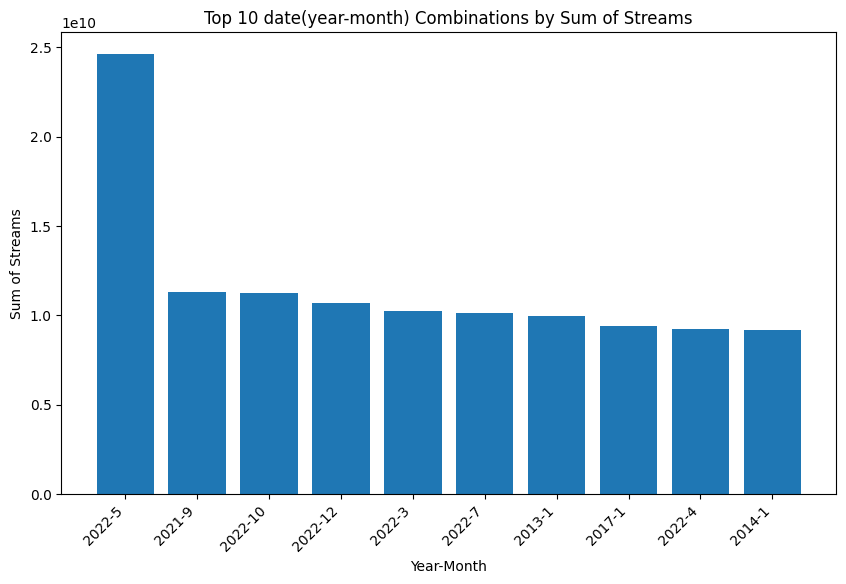

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Combine 'released_year' and 'released_month' to create a new column 'year_month'
data['year_month'] = data['released_year'].astype(str) + '-' + data['released_month'].astype(str)

# Group by 'year_month' and calculate the sum of streams
monthly_streams = data.groupby('year_month')['streams'].sum().reset_index()

# Sort by the sum of streams in descending order
top_10_months = monthly_streams.sort_values(by='streams', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_months['year_month'], top_10_months['streams'])
plt.xlabel('Year-Month')
plt.ylabel('Sum of Streams')
plt.title('Top 10 date(year-month) Combinations by Sum of Streams')
plt.xticks(rotation=45, ha='right')
plt.show()


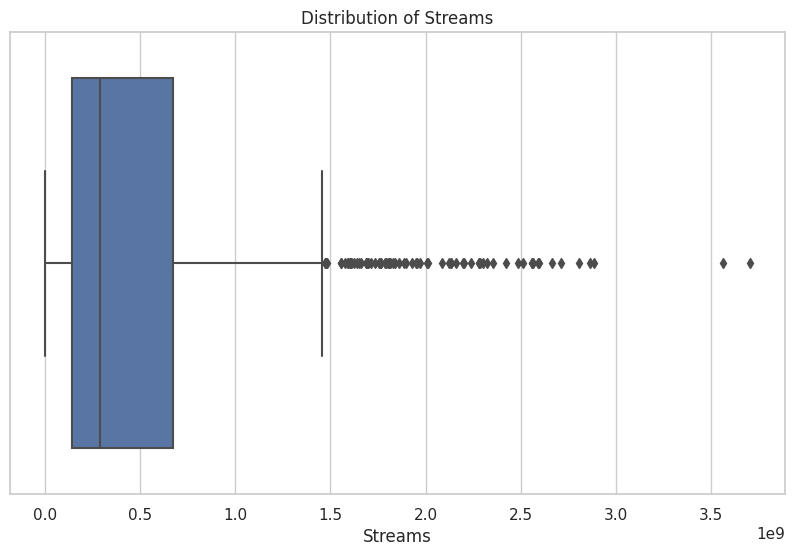

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of 'streams'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['streams'])
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.show()


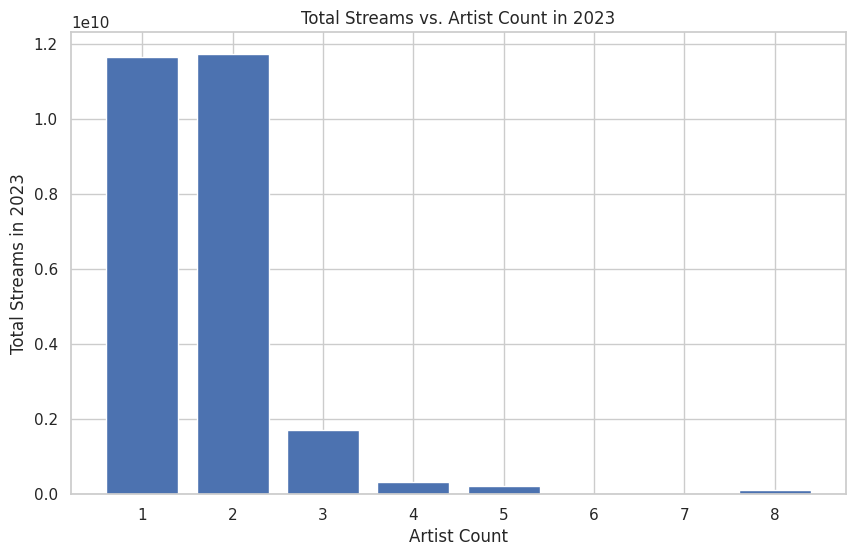

Streams values for each artist count:
   artist_count      streams
0             1  11666092133
1             2  11737110312
2             3   1726953446
3             4    334464752
4             5    220741048
5             8    123122413


In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the year 2023
data_2023 = data[data['released_year'] == 2023]

# Group by artist count and sum the streams
streams_by_artist_count = data_2023.groupby('artist_count')['streams'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(streams_by_artist_count['artist_count'], streams_by_artist_count['streams'])
plt.xlabel('Artist Count')
plt.ylabel('Total Streams in 2023')
plt.title('Total Streams vs. Artist Count in 2023')
plt.show()

# Print the streams values
print("Streams values for each artist count:")
print(streams_by_artist_count)


In [ ]:
# Count the number of rows for each artist count
data_2023 = data[data['released_year'] == 2023]

count_artist_count = data_2023['artist_count'].value_counts()

# Display the counts for artist counts 1 and 2 separately
count_artist_count_1 = count_artist_count.get(1, 0)
count_artist_count_2 = count_artist_count.get(2, 0)

print("Total rows with artist count 1:", count_artist_count_1)
print("Total rows with artist count 2:", count_artist_count_2)


Total rows with artist count 1: 80
Total rows with artist count 2: 70


In [ ]:
data.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'key_encoded', 'mode_encoded', 'year_month'],
      dtype='object')

In [ ]:
# Convert 'day', 'month', and 'year' columns to integers
data['day'] = data['released_day'].astype(int)
data['month'] = data['released_month'].astype(int)
data['year'] = data['released_year'].astype(int)

# Combine 'day', 'month', and 'year' columns into a single 'date' column
data['date'] = pd.to_datetime(data[['day', 'month', 'year']])

# Group by 'date' and calculate the sum of streams for each date
top_dates = data.groupby('date')['streams'].sum().nlargest(10)

# Display the top 10 dates with the highest total streams
print(top_dates)


date
2022-05-06    13432412789
2013-01-01     9971940841
2014-01-01     9188569535
2011-01-01     6125872350
2012-01-01     6118305522
2022-10-21     5695886046
2002-01-01     4720379660
2021-05-21     4674584179
1999-01-01     4484162421
2020-03-20     4114837169
Name: streams, dtype: int64
